# **Deep Learning - Lab 5**

**Name :** Satwik Shirpurwar

**Batch :** A3

**Roll No.:** 52

**Aim :** Design and develop an Artificial Neural Network model using below conditions for diabetes prediction.
        
1. Perform EDA·        
2. Train and evaluate the performance of model using appropriate metrics.
3. Display run time chart
4. Apply regularization technique like L1, L2, dropout and early stopping to improve the performance of the model.
5. Experiment with individual or combination of regularization techniques.
6. Provide comparative analysis
7. Save the ANN model


Tips:

L1 and L2:
from tensorflow.keras.regularizers import l2,l1
Model.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.1)))



Early Stooping:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss", min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None, restore_best_weights=False)


irisModel.fit(x_train,y_train_encoded,epochs=1000,validation_data=(x_test,y_test_encoded),callbacks=callback)

Dropout


irisModel2.add(Dense(8,activation='relu'))
irisModel2.add(Dropout(0.4))


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
import time
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import Dropout

In [3]:
df = pd.read_excel('/content/diabetes.xlsx')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking for null values

In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Checking for duplicate values

In [6]:
df[df.duplicated]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: >

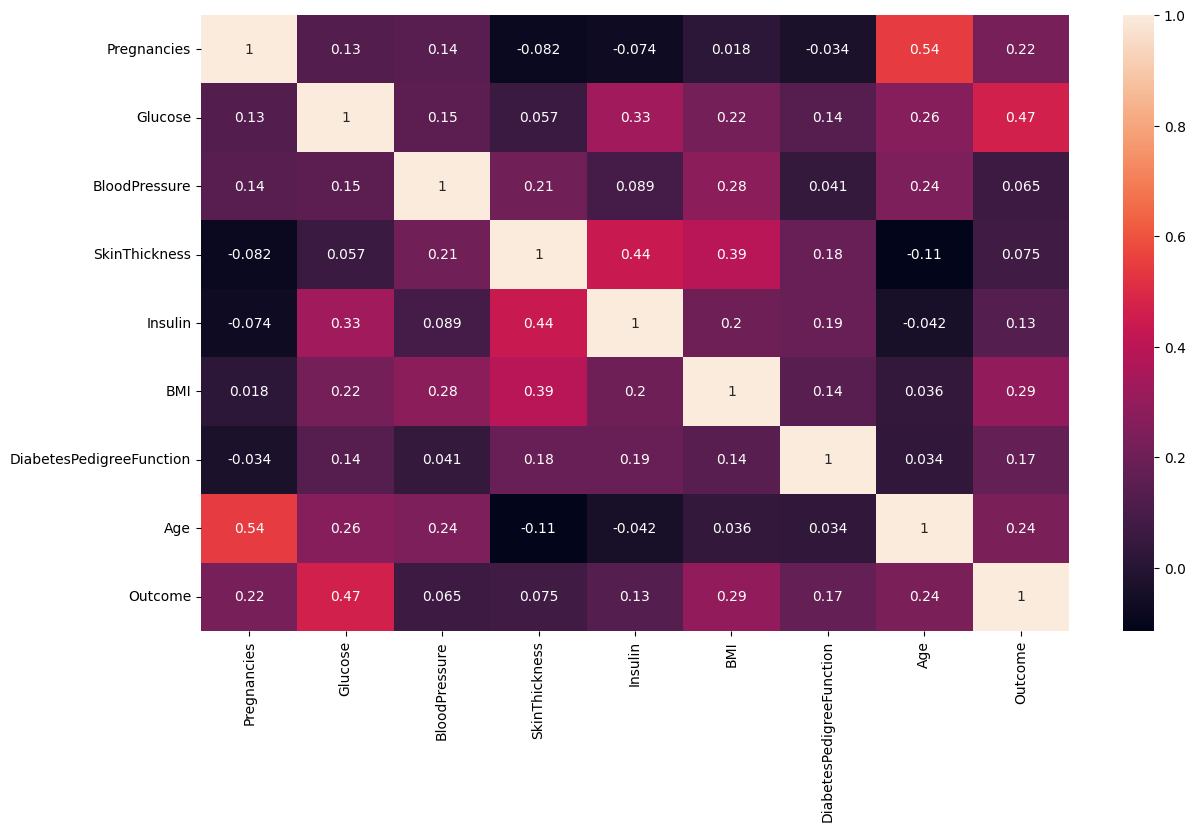

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Applying Train-Test-Split

In [9]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Standard Scaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating an ANN Model

In [12]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

start_time = time.time()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()

model.save('diabetic_ann_.h5')

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6302 - loss: 0.6578 - val_accuracy: 0.7403 - val_loss: 0.5644
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7521 - loss: 0.5187 - val_accuracy: 0.7662 - val_loss: 0.5111
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7857 - loss: 0.4517 - val_accuracy: 0.7662 - val_loss: 0.4951
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7780 - loss: 0.4439 - val_accuracy: 0.7662 - val_loss: 0.5006
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7808 - loss: 0.4510 - val_accuracy: 0.7597 - val_loss: 0.5081
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7829 - loss: 0.4285 - val_accuracy: 0.7662 - val_loss: 0.5116
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8083 - loss: 0.3963 - val_accuracy: 0.7727 - val_loss: 0.5140
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7913 - loss: 0.4138 - val_accuracy: 0.7532 - val_loss: 0.

### Applying Regularization techniques

#### Using L1, L2 regularization

In [13]:
callback = EarlyStopping(monitor="val_loss", min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None, restore_best_weights=False)

In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,), kernel_regularizer=l1(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time_l1l2 = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))
end_time_l1l2 = time.time()

model.save('diabetic_ann_l1l2.h5')

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6149 - loss: 2.5215 - val_accuracy: 0.7078 - val_loss: 2.1743
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7316 - loss: 2.0687 - val_accuracy: 0.7727 - val_loss: 1.8218
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7719 - loss: 1.7315 - val_accuracy: 0.7597 - val_loss: 1.5534
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7816 - loss: 1.4534 - val_accuracy: 0.7597 - val_loss: 1.3469
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7866 - loss: 1.2641 - val_accuracy: 0.7597 - val_loss: 1.1699
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7981 - loss: 1.0870 - val_accuracy: 0.7727 - val_loss: 1.0330
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7732 - loss: 0.9764 - val_accuracy: 0.7597 - val_loss: 0.9254
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.8793 - val_accuracy: 0.7597 - 

#### Using Early Stopping

In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time_earlystop = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=callback)
end_time_earlystop = time.time()

model.save('diabetic_ann_earlystopping.h5')

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5104 - loss: 0.6985 - val_accuracy: 0.7338 - val_loss: 0.5794
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7166 - loss: 0.5563 - val_accuracy: 0.7468 - val_loss: 0.5191
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7881 - loss: 0.4782 - val_accuracy: 0.7532 - val_loss: 0.5102
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7892 - loss: 0.4535 - val_accuracy: 0.7662 - val_loss: 0.5146
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7912 - loss: 0.4180 - val_accuracy: 0.7727 - val_loss: 0.5265
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7883 - loss: 0.4271 - val_accuracy: 0.7792 - val_loss: 0.5267
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8147 - loss: 0.3901 - val_accuracy: 0.7662 - val_loss: 0.5408
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8151 - loss: 0.3960 - val_accuracy: 0.7403 - 

#### Using L1, L2 regularization, EarlyStopping, and Dropout

In [16]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,), kernel_regularizer=l1(0.01)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time_regularized_all = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=callback)
end_time_regularized_all = time.time()

model.save('diabetic_ann_regularized_all.h5')

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5844 - loss: 2.5501 - val_accuracy: 0.6623 - val_loss: 2.2832
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6826 - loss: 2.1901 - val_accuracy: 0.6623 - val_loss: 1.9955
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6684 - loss: 1.9296 - val_accuracy: 0.6883 - val_loss: 1.7446
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6880 - loss: 1.6871 - val_accuracy: 0.7273 - val_loss: 1.5246
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7053 - loss: 1.4507 - val_accuracy: 0.7208 - val_loss: 1.3411
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7454 - loss: 1.2807 - val_accuracy: 0.7338 - val_loss: 1.1854
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7189 - loss: 1.1440 - val_accuracy: 0.7597 - val_loss: 1.0537
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7158 - loss: 1.0438 - val_accuracy: 0.7727 - 

### Calculating Runtime of model

#### Without Regularization

In [17]:
print("Training time: ", end_time - start_time)

Training time:  46.38692259788513


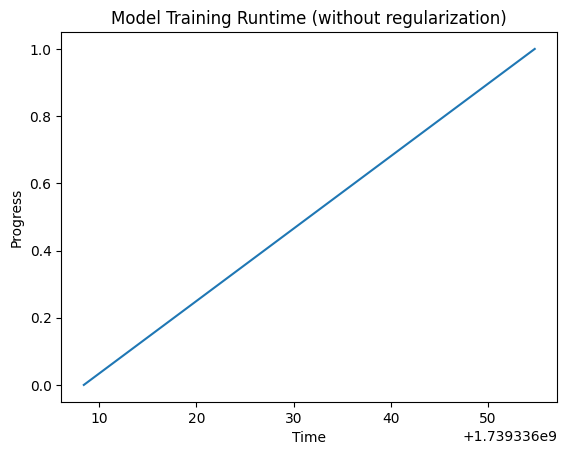

In [18]:
plt.plot([start_time, end_time], [0,1])
plt.title('Model Training Runtime (without regularization)')
plt.ylabel('Progress')
plt.xlabel('Time')
plt.show()

#### Using L1 and L2 Regularization

In [19]:
print("Training time: ", end_time_l1l2 - start_time_l1l2)

Training time:  45.2414972782135


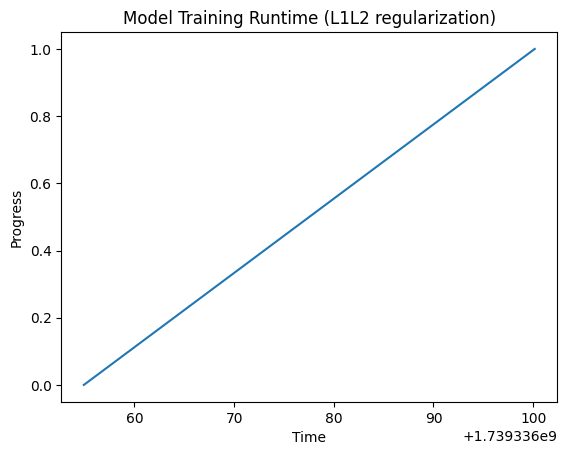

In [20]:
plt.plot([start_time_l1l2, end_time_l1l2], [0,1])
plt.title('Model Training Runtime (L1L2 regularization)')
plt.ylabel('Progress')
plt.xlabel('Time')
plt.show()

#### Using EarlyStopping Regularization

In [21]:
print("Training time: ", end_time_earlystop - start_time_earlystop)

Training time:  7.153659820556641


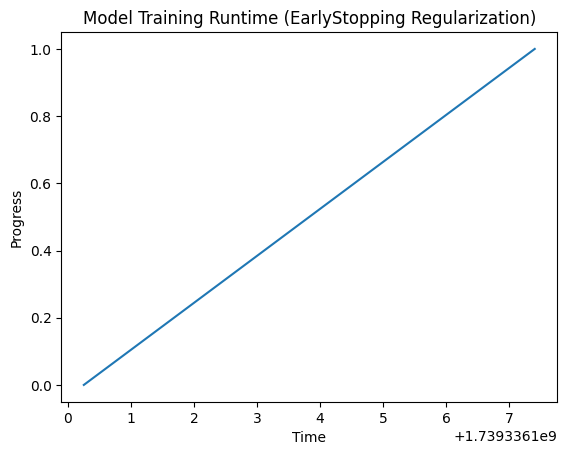

In [22]:
plt.plot([start_time_earlystop, end_time_earlystop], [0,1])
plt.title('Model Training Runtime (EarlyStopping Regularization)')
plt.ylabel('Progress')
plt.xlabel('Time')
plt.show()

#### Using L1L2, Dropout, and EarlyStopping Regularization

In [23]:
print("Training time: ", end_time_regularized_all - start_time_regularized_all)

Training time:  18.586008548736572


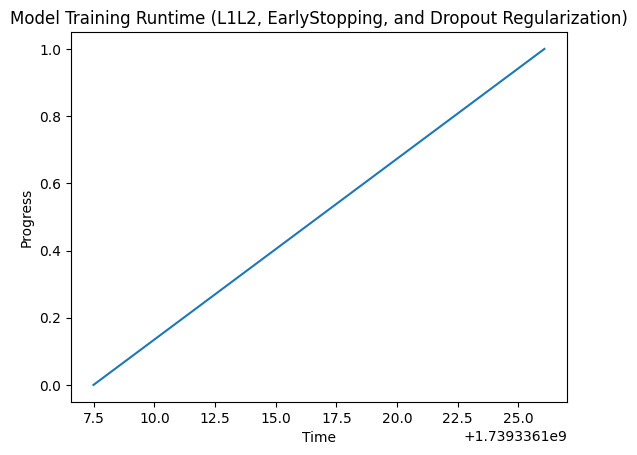

In [24]:
plt.plot([start_time_regularized_all, end_time_regularized_all], [0,1])
plt.title('Model Training Runtime (L1L2, EarlyStopping, and Dropout Regularization)')
plt.ylabel('Progress')
plt.xlabel('Time')
plt.show()

---

### Calculating the Accuracy of model using test dataset

In [25]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy: ", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7242 - loss: 0.5601 
Accuracy:  0.7467532753944397
